In [34]:
import matplotlib.pyplot as plt
import pandas as pd


In [35]:
def read_midas(midas_filename:str):
    df = pd.read_csv(midas_filename)
    df.drop(columns=df.columns[0], axis=1, inplace=True)
    df = df[(df.filter(regex='^DA:.*') != 0).all(axis=1)]

    TR_cols = list(filter(lambda x: x.startswith('TR:'), df.columns))
    input_inter = df[TR_cols]
    input_inter.columns = input_inter.columns.str.replace('TR:', '')
    DV_cols = list(filter(lambda x: x.startswith('DV:'), df.columns))
    readouts = df[DV_cols]
    readouts.columns = readouts.columns.str.replace('DV:', '')

    
    
    return input_inter, readouts

[[<AxesSubplot: > <AxesSubplot: >]
 [<AxesSubplot: > <AxesSubplot: >]]


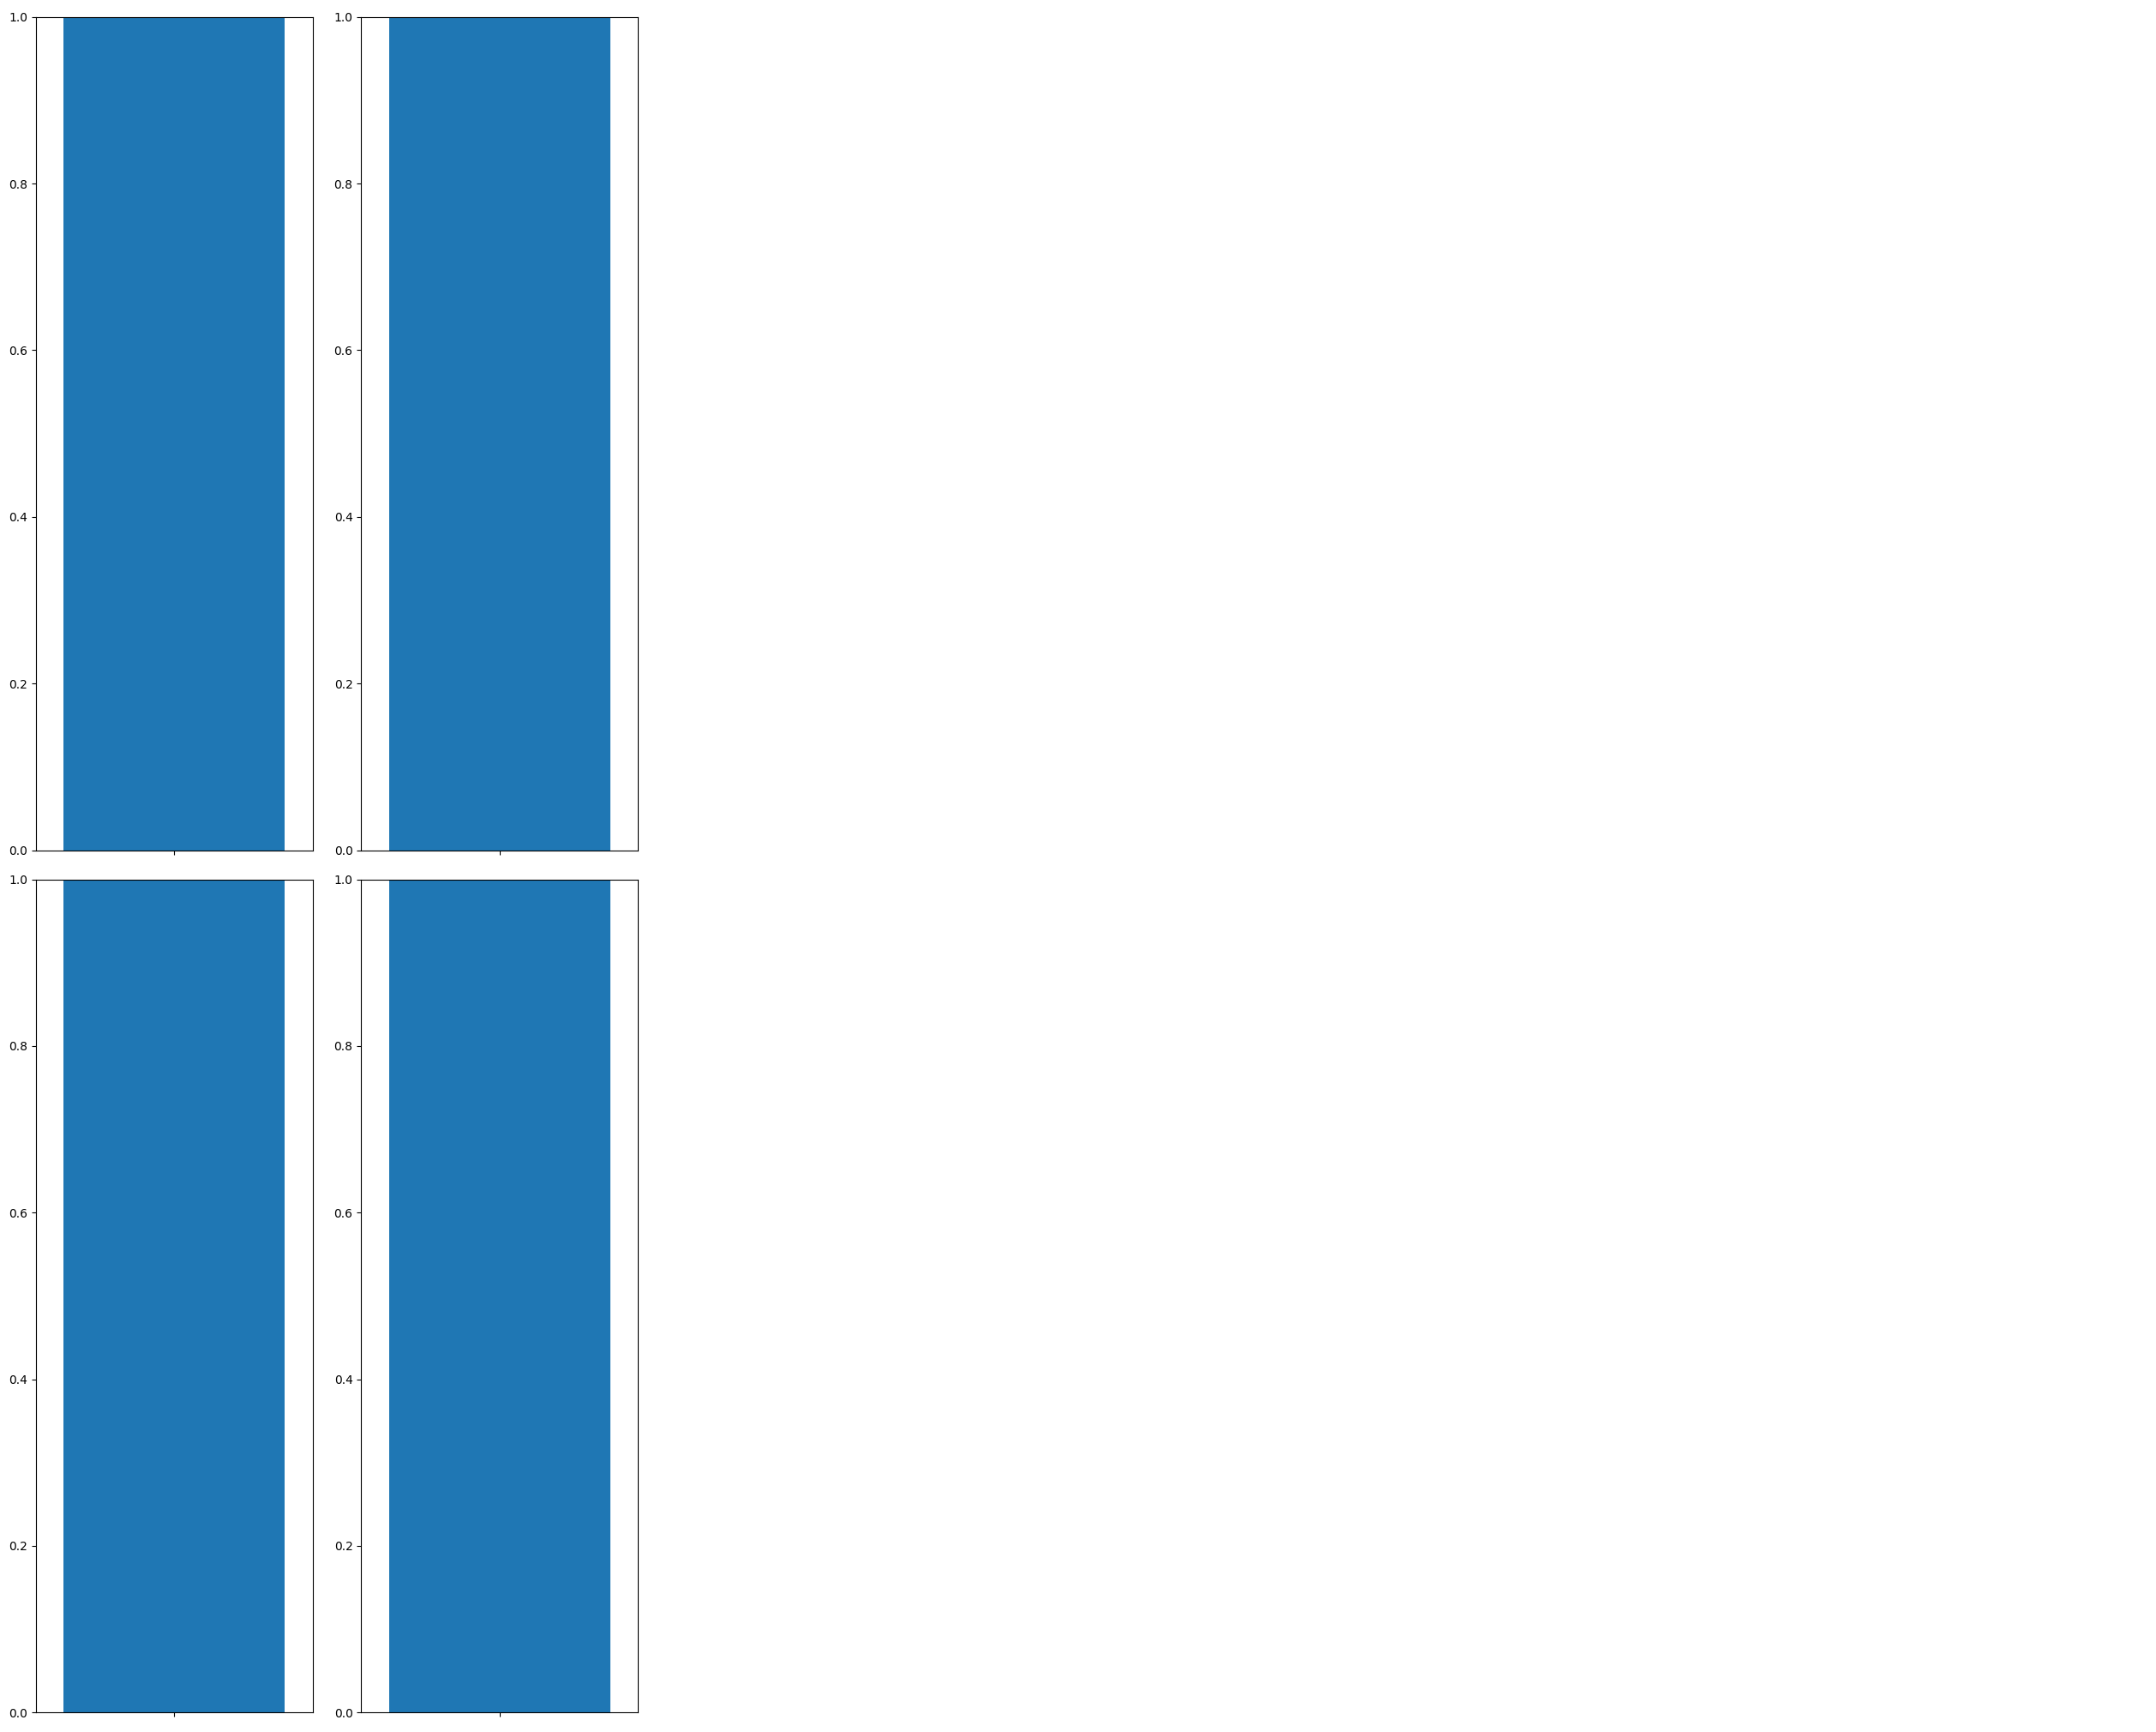

In [36]:

fig = plt.figure(constrained_layout=True, figsize=(25, 20))

subfigs = fig.subfigures(1, 2, width_ratios=[30,70])

axs = subfigs[0].subplots(2, 2)
print(axs)
for i in range(2):
    for j in range(2):

        ax = axs[i,j]
        ax.bar([''], [1])
        ax.set_ylim([0, 1])
        ax.set_xlim([-0.5, 0.5])

NameError: name 'mean' is not defined

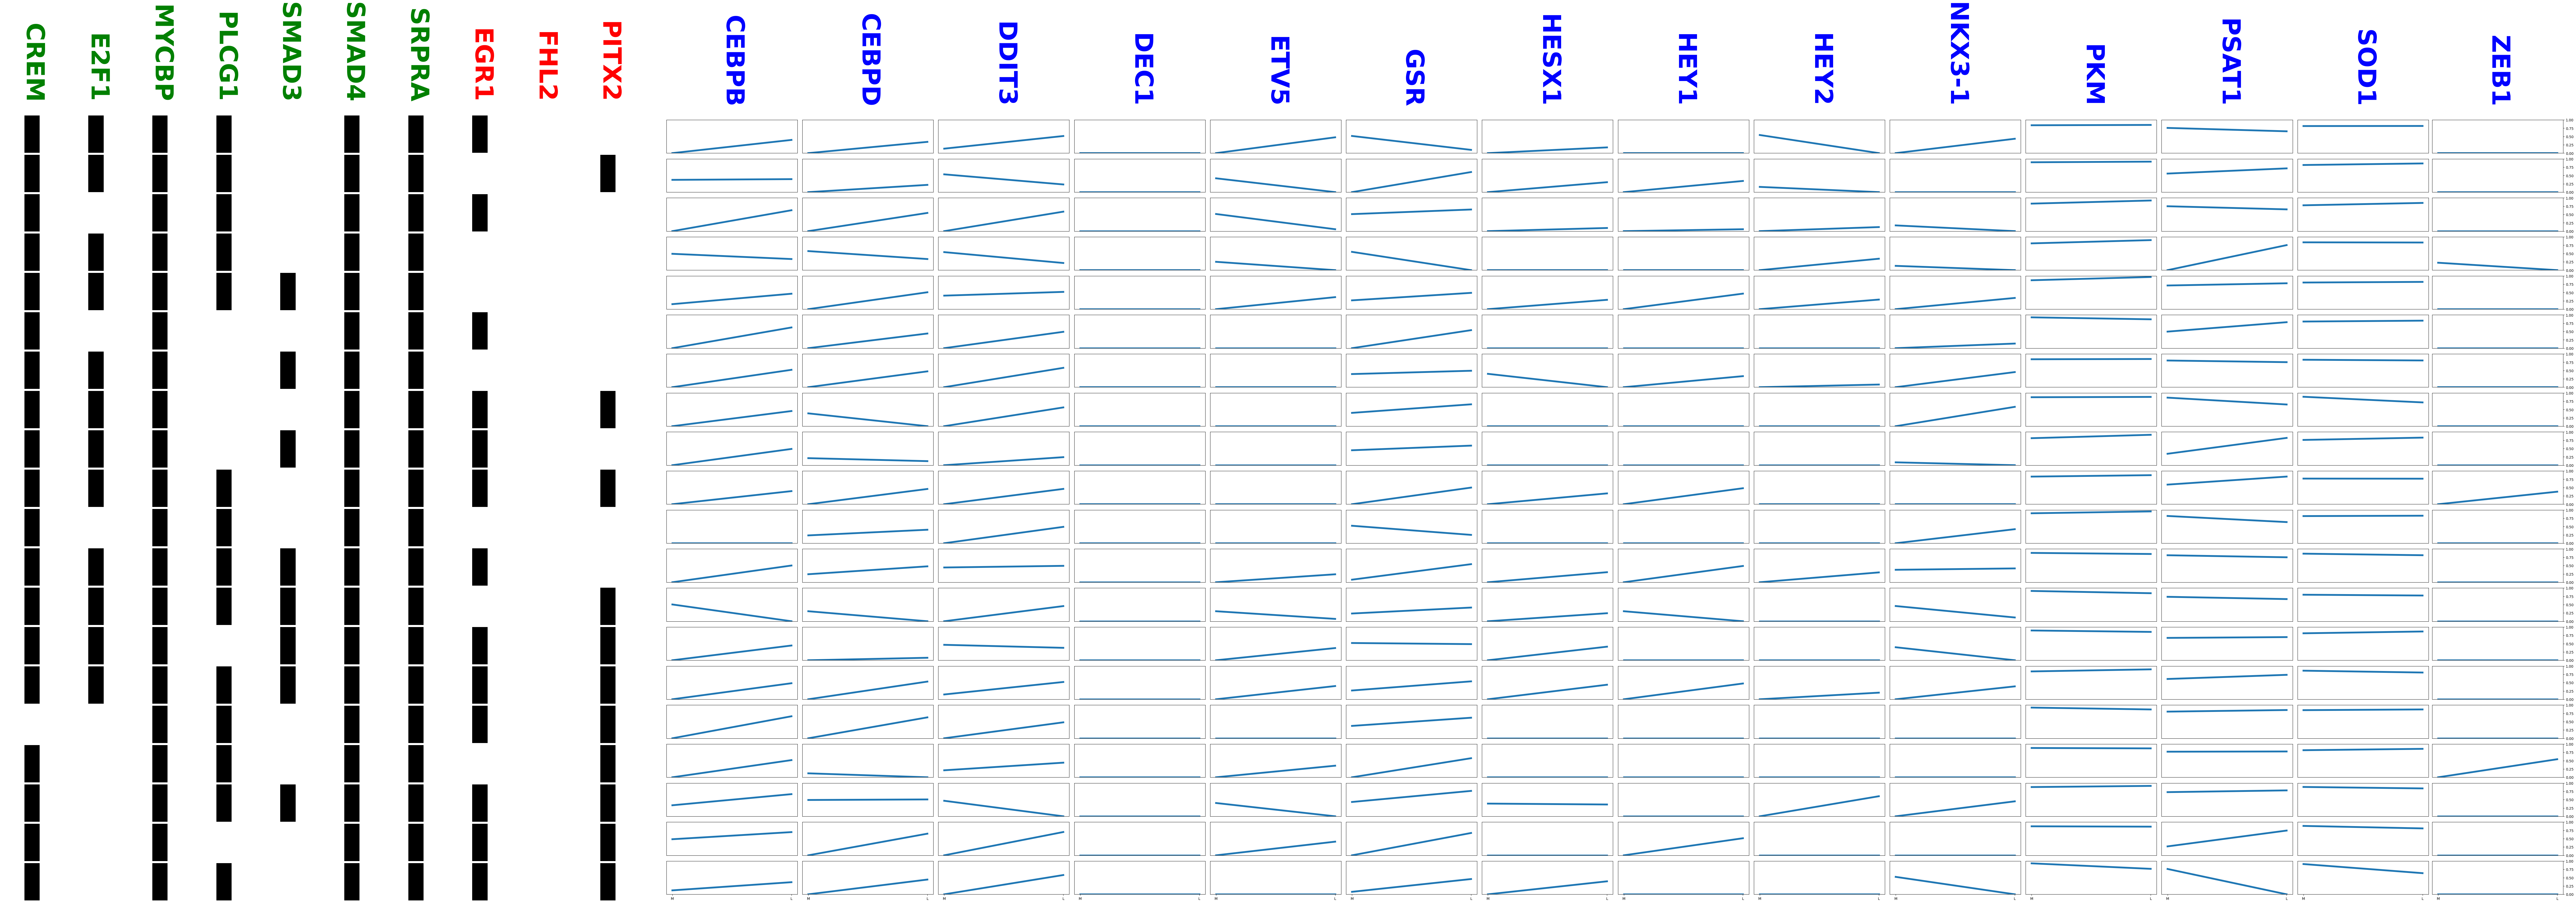

In [39]:
# medium_filename = '/home/e21g017n/Nextcloud/work/ISMB-ECCB_paper/scRNA2BoNI/demo/expected_results/medium_TE_midas.csv'
# late_filename = '/home/e21g017n/Nextcloud/work/ISMB-ECCB_paper/scRNA2BoNI/demo/expected_results/late_TE_midas.csv'
# input_genes = ["KAT2A", "RBPJ", "SEMA4A", "MAX", "NCOR1", "JAK2"]
# intermediate_genes = ["EGR1", "MYB", "TERT", "C21orf33"]
# medium_filename = '/home/e21g017n/Nextcloud/work/gitlab_repos/CCIPL_common/scrna2boni_exploration/pkn_reconstruction/depth2_TF_only_mediumANDlate/medium_TE_midas.csv'
# late_filename = '/home/e21g017n/Nextcloud/work/gitlab_repos/CCIPL_common/scrna2boni_exploration/pkn_reconstruction/depth2_TF_only_mediumANDlate/late_TE_midas.csv'

medium_filename = '/home/e21g017n/Nextcloud/work/gitlab_repos/method_results/ismb_paper/PAPER_RUN_K10/medium_TE_midas.csv'
late_filename = '/home/e21g017n/Nextcloud/work/gitlab_repos/method_results/ismb_paper/PAPER_RUN_K10/late_TE_midas.csv'
input_genes = ["SRPRA", "PLCG1", "MYCBP", "SMAD4", "SMAD3", "CREM", "E2F1"]
intermediate_genes = ["EGR1", "FHL2", "PITX2"]

input_inter, medium_readouts = read_midas(medium_filename)
_, late_readouts = read_midas(late_filename)


classes = ['M', 'L']

nb_input_inter = input_inter.shape[1]
nb_pert= input_inter.shape[0]
nb_readouts = medium_readouts.shape[1]
nb_genes = nb_input_inter+nb_readouts
fig = plt.figure(constrained_layout=True, figsize=(100, 35))

subfigs = fig.subfigures(1, 2, width_ratios=[25,75])

axs = subfigs[0].subplots(nb_pert, nb_input_inter)

for i in range(nb_pert):
    for j in range(nb_input_inter):
        ax = axs[i, j]
        value = input_inter.iloc[i, j]
        ax.bar([1,2,3], [0,value,0], color='black')
        ax.set_frame_on(False)
        # ax.xaxis.set_visible(False)
        # ax.yaxis.set_visible(False)
        ax.set_xticks([])  # supprimer les graduations de l'axe x pour chaque sous-graphe
        ax.set_yticks([])
        # ax.set_xlim([-0.2, 0.2])
        ax.set_ylim([0,1])
        if i == 0:
            gene_name = input_inter.columns[j]
            ax.set_xlabel(gene_name, fontsize = 70, weight='bold', rotation=-90, labelpad=50)
            ax.xaxis.set_label_position('top')
            if gene_name in input_genes:
                ax.xaxis.label.set_color('green')
            else:
                ax.xaxis.label.set_color('red')

axs = subfigs[1].subplots(nb_pert, nb_readouts)

differencies = dict()

for i in range(nb_pert):
    for j in range(nb_readouts):
        ax = axs[i, j]
        val1 = medium_readouts.iloc[i, j]
        val2 = late_readouts.iloc[i, j]
        ax.plot(classes, [val1, val2], linewidth=5)
        ax.set_ylim([0,1])
        if j != nb_readouts-1:
            ax.set_yticks([])
        else:
            ax.yaxis.set_label_position("right")
            ax.yaxis.tick_right()
        if i == 0:
            ax.set_xlabel(medium_readouts.columns[j], fontsize = 70, weight='bold', rotation=-90, labelpad=50)
            ax.xaxis.set_label_position('top')

            ax.xaxis.label.set_color('blue')
        
        if i != nb_pert-1:
            ax.set_xticks([])

        # compute differencies_expression
        gene_name = medium_readouts.columns[j]
        if not gene_name in differencies.keys():
            differencies[gene_name] = {
                'values': [abs(val1-val2)],
                'mean': 0
            }
        else:
            differencies[gene_name]['values'].append(abs(val1-val2))
        

# plt.show()
plt.savefig("/home/e21g017n/Nextcloud/work/ISMB-ECCB_paper/figures/pseudo-perturbation_visu_modified.png")


for gene, data in differencies.items():
    data['mean'] = mean(data['values'])

print(differencies)


In [40]:
from statistics import mean
for gene, data in differencies.items():
    data['mean'] = mean(data['values'])

print(differencies)


{'CEBPB': {'values': [0.396897606085465, 0.02140353493921998, 0.6283839212469237, 0.15713326870012678, 0.3132224625251696, 0.6229398165411291, 0.5224103214259079, 0.4556641061973301, 0.4890745022000148, 0.3938399582370049, 0.0, 0.5027220523528972, 0.5046610485494817, 0.4434335148034901, 0.4822880155119695, 0.6617197404728167, 0.5167424863897382, 0.334253113580431, 0.21403534939219931, 0.2454321724215079], 'mean': 0.39531284957864116}, 'CEBPD': {'values': [0.3383548363039749, 0.2182116488925348, 0.5475426952047132, 0.2387202625102543, 0.508166157058692, 0.4407487508389887, 0.4759489894846744, 0.3858602431202923, 0.0896412857036319, 0.4586471772689984, 0.16996047430830039, 0.237004996644045, 0.3010664479081213, 0.0751733910060407, 0.5318815720784548, 0.6287568051308822, 0.1193228428667313, 0.016406890894175574, 0.6507569542844358, 0.4441792825714072], 'mean': 0.34381758520396744}, 'DDIT3': {'values': [0.3796703706465806, 0.3040495189797897, 0.5861734655828175, 0.3267954359012603, 0.11246

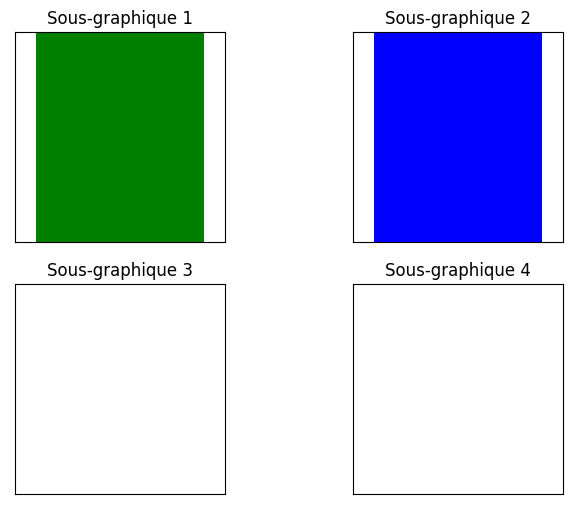

In [28]:
import matplotlib.pyplot as plt

# Création de données pour les graphiques
x = ['']
y1 = [1]
y2 = [0]

# Création des sous-graphiques
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

# Tracé du premier sous-graphique avec une barre pleine
ax[0, 0].bar(x, y1, color='green')

# Tracé du deuxième sous-graphique avec une barre pleine
ax[0, 1].bar(x, y1, color='blue')

# Tracé du troisième sous-graphique avec une barre vide
ax[1, 0].bar(x, y2, color='red', hatch='//')

# Tracé du quatrième sous-graphique avec une barre vide
ax[1, 1].bar(x, y2, color='orange', hatch='//')

# Suppression des espaces intérieurs des sous-graphiques
for axi in ax.flat:
    axi.set_ylim([0, 1])
    axi.set_xlim([-0.5, 0.5])
    axi.set_aspect('equal')
    axi.set_xticks([])
    axi.set_yticks([])

# Ajout de titres pour chaque sous-graphique
ax[0, 0].set_title('Sous-graphique 1')
ax[0, 1].set_title('Sous-graphique 2')
ax[1, 0].set_title('Sous-graphique 3')
ax[1, 1].set_title('Sous-graphique 4')

# Affichage de la figure
plt.show()
